# **Data Pre-Processing:**

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import glob


In [6]:
# Step 2: Load the data to Google Colab (Optional)
#from google.colab import files
#uploaded = files.upload()


In [7]:
# Step 2: Load the data from Excel using Pandas
excel_files = glob.glob("Data/*.xlsx")
data = pd.concat([pd.read_excel(file) for file in excel_files])

# data = pd.read_excel('My_Room.xlsx')

# Step 3: Inspect the data to understand its structure
print("Data Preview:")
print(data.head())


Data Preview:
             Timestamp          Download Speed  Download Speed (Additional)  \
0  2024-10-31 10:55:30    953.67431640625 Mbps                          NaN   
1  2024-10-31 10:55:40        610.3515625 Mbps                          NaN   
2  2024-10-31 10:55:50  876.9419001436783 Mbps                          NaN   
3   2024-10-31 10:56:0  876.9419001436783 Mbps                          NaN   
4  2024-10-31 10:56:10  1155.968868371212 Mbps                          NaN   

  Signal Strength  Signal Strength (Additional) Network Type Device Status  \
0       -14.0 dBm                           NaN        Wi-Fi       Unknown   
1       -13.0 dBm                           NaN        Wi-Fi       Unknown   
2       -13.0 dBm                           NaN        Wi-Fi       Unknown   
3       -13.0 dBm                           NaN        Wi-Fi       Unknown   
4       -13.0 dBm                           NaN        Wi-Fi       Unknown   

   Pixel Latitude (X)  Pixel Longitude (Y)

In [8]:
# Step 4: Replace "Unknown" with NaN and drop columns with all NaN or "Unknown" values
data.replace("Unknown", np.nan, inplace=True)
data.dropna(axis=1, how='all', inplace=True)
data = data.drop(columns=['Download Speed (Additional)', 'Signal Strength (Additional)', 'Unnamed: 9', 'Unnamed: 10'], errors='ignore')

print("Data Shape:")
print(data.shape)
print("Cleaned Data:")
print(data.head())

Data Shape:
(840, 6)
Cleaned Data:
             Timestamp          Download Speed Signal Strength Network Type  \
0  2024-10-31 10:55:30    953.67431640625 Mbps       -14.0 dBm        Wi-Fi   
1  2024-10-31 10:55:40        610.3515625 Mbps       -13.0 dBm        Wi-Fi   
2  2024-10-31 10:55:50  876.9419001436783 Mbps       -13.0 dBm        Wi-Fi   
3   2024-10-31 10:56:0  876.9419001436783 Mbps       -13.0 dBm        Wi-Fi   
4  2024-10-31 10:56:10  1155.968868371212 Mbps       -13.0 dBm        Wi-Fi   

   Pixel Latitude (X)  Pixel Longitude (Y)  
0                 255                   75  
1                 255                   75  
2                 255                   75  
3                 255                   75  
4                 255                   75  


<ipython-input-8-e0c22457d15d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("Unknown", np.nan, inplace=True)


In [9]:
# Step 5: Clean 'Download Speed' and 'Signal Strength' columns by removing any non-numeric characters
# Remove any non-numeric characters like "dBm" from 'signal_strength'
# Use regex to capture only the numeric part of the string
data['Download Speed'] = data['Download Speed'].astype(str).str.extract(r'([-]?\d+\.?\d*)')[0]
data['Signal Strength'] = data['Signal Strength'].astype(str).str.extract(r'([-]?\d+\.?\d*)')[0]

# Step 5: Convert cleaned columns to numeric, handling any errors by setting invalid entries to NaN
data['Download Speed'] = pd.to_numeric(data['Download Speed'], errors='coerce')
data['Signal Strength'] = pd.to_numeric(data['Signal Strength'], errors='coerce')

# data['Download Speed'] = pd.to_numeric(data['Download Speed'].astype(str).str.replace(r"[^\d.-]", ""), errors='coerce')
# data['Signal Strength'] = pd.to_numeric(data['Signal Strength'].astype(str).str.replace(r"[^\d.-]", ""), errors='coerce')

print("Cleaned Data Preview:")
print(data.head())


Cleaned Data Preview:
             Timestamp  Download Speed  Signal Strength Network Type  \
0  2024-10-31 10:55:30      953.674316            -14.0        Wi-Fi   
1  2024-10-31 10:55:40      610.351562            -13.0        Wi-Fi   
2  2024-10-31 10:55:50      876.941900            -13.0        Wi-Fi   
3   2024-10-31 10:56:0      876.941900            -13.0        Wi-Fi   
4  2024-10-31 10:56:10     1155.968868            -13.0        Wi-Fi   

   Pixel Latitude (X)  Pixel Longitude (Y)  
0                 255                   75  
1                 255                   75  
2                 255                   75  
3                 255                   75  
4                 255                   75  


# **Data Processing:**

In [10]:
# Step 6: Create the 'coordinate' column by combining 'x' and 'y'
data['Coordinate'] = data['Pixel Latitude (X)'].astype(str) + ',' + data['Pixel Longitude (Y)'].astype(str)

#Replace "Unknown" with NaN and drop columns with all NaN or "Unknown" values
# data.replace("Unknown", np.nan, inplace=True)
# data.dropna(axis=1, how='all', inplace=True)

print("Pre-Processed Data Preview:")
print(data.head())

Pre-Processed Data Preview:
             Timestamp  Download Speed  Signal Strength Network Type  \
0  2024-10-31 10:55:30      953.674316            -14.0        Wi-Fi   
1  2024-10-31 10:55:40      610.351562            -13.0        Wi-Fi   
2  2024-10-31 10:55:50      876.941900            -13.0        Wi-Fi   
3   2024-10-31 10:56:0      876.941900            -13.0        Wi-Fi   
4  2024-10-31 10:56:10     1155.968868            -13.0        Wi-Fi   

   Pixel Latitude (X)  Pixel Longitude (Y) Coordinate  
0                 255                   75     255,75  
1                 255                   75     255,75  
2                 255                   75     255,75  
3                 255                   75     255,75  
4                 255                   75     255,75  


In [11]:
# Step 7: Group by 'coordinate' and calculate averages for 'signal_strength' and 'download_speed'
aggregated_data = data.groupby('Coordinate').agg(
    Pixel_Latitude_X=('Pixel Latitude (X)', 'first'),  # 'x' is latitude
    Pixel_Longitude_Y=('Pixel Longitude (Y)', 'first'), # 'y' is longitude
    Network_Type=('Network Type', 'first'),
    avg_signal_strength_dBm=('Signal Strength', 'mean'),
    avg_download_speed_Mbps=('Download Speed', 'mean')
).reset_index()

print("Data Shape:")
print(aggregated_data.shape)
print("Processed Data Preview:")
print(aggregated_data.head(20))

Data Shape:
(84, 6)
Processed Data Preview:
   Coordinate  Pixel_Latitude_X  Pixel_Longitude_Y Network_Type  \
0     111,123               111                123        Wi-Fi   
1     111,171               111                171        Wi-Fi   
2     111,210               111                210        Wi-Fi   
3     111,268               111                268        Wi-Fi   
4     111,316               111                316        Wi-Fi   
5     111,364               111                364        Wi-Fi   
6     111,412               111                412        Wi-Fi   
7     111,460               111                460        Wi-Fi   
8     159,123               159                123        Wi-Fi   
9     159,171               159                171        Wi-Fi   
10    159,210               159                210        Wi-Fi   
11    159,268               159                268        Wi-Fi   
12    159,316               159                316        Wi-Fi   
13    159,364     

In [12]:
# Step 8: Save the aggregated data to a new CSV file
output_file = 'processed_data.csv'
aggregated_data.to_csv(output_file, index=False)
print(f"Processed data saved to {output_file}")


Processed data saved to processed_data.csv


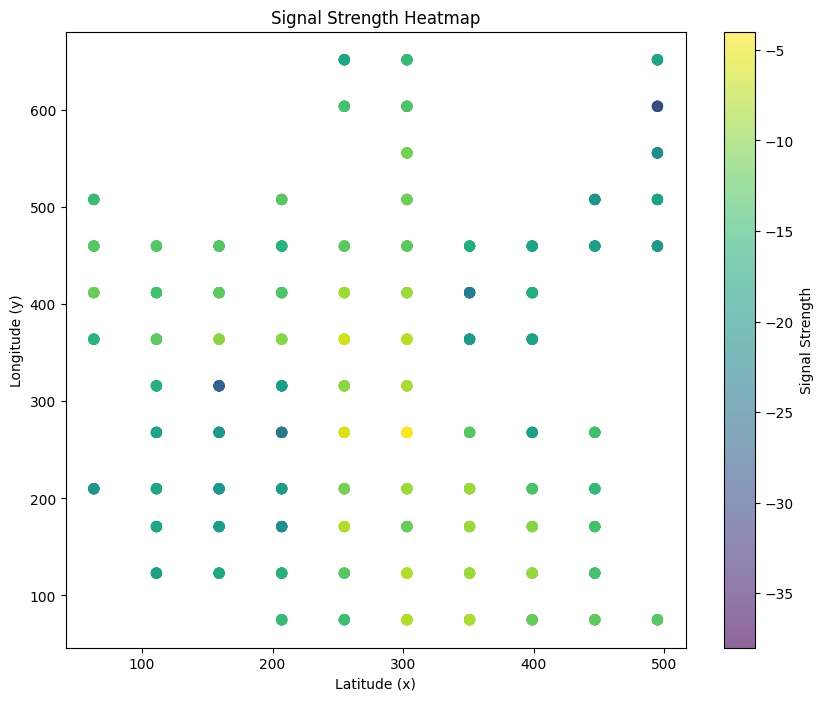

In [13]:
# Step 9: Visualize data - Plot signal strength heatmap
plt.figure(figsize=(10, 8))
plt.scatter(data['Pixel Latitude (X)'], data['Pixel Longitude (Y)'], c=data['Signal Strength'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Signal Strength')
plt.xlabel('Latitude (x)')
plt.ylabel('Longitude (y)')
plt.title('Signal Strength Heatmap')
plt.show()


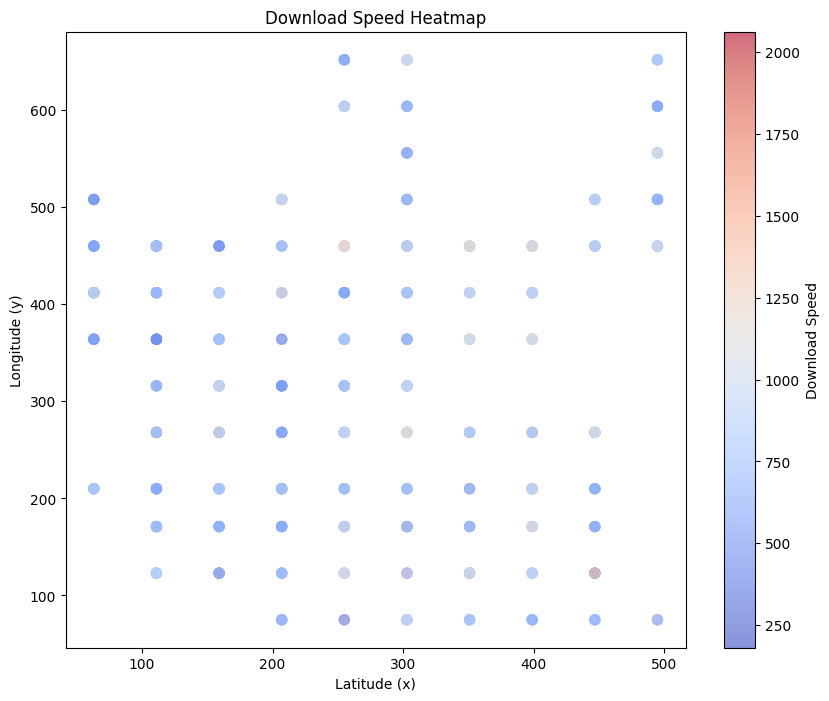

In [14]:
# Visualize download speed heatmap
plt.figure(figsize=(10, 8))
plt.scatter(data['Pixel Latitude (X)'], data['Pixel Longitude (Y)'], c=data['Download Speed'], cmap='coolwarm', s=50, alpha=0.6)
plt.colorbar(label='Download Speed')
plt.xlabel('Latitude (x)')
plt.ylabel('Longitude (y)')
plt.title('Download Speed Heatmap')
plt.show()

# **Data Visualization**

In [15]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np


In [16]:
# Step 2: Load the data from CSV
# 'processed_data.csv' has already been created with coordinate, latitude, longitude, avg_signal_strength, avg_download_speed
data = pd.read_csv('processed_data.csv')

print("Processed Data Preview:")
print(data.head())

Processed Data Preview:
  Coordinate  Pixel_Latitude_X  Pixel_Longitude_Y Network_Type  \
0    111,123               111                123        Wi-Fi   
1    111,171               111                171        Wi-Fi   
2    111,210               111                210        Wi-Fi   
3    111,268               111                268        Wi-Fi   
4    111,316               111                316        Wi-Fi   

   avg_signal_strength_dBm  avg_download_speed_Mbps  
0                    -18.8               786.214288  
1                    -17.6               717.930458  
2                    -18.0               731.089554  
3                    -18.9               851.166909  
4                    -16.6               962.604422  


In [17]:
# The floor plan image file name is 'floor_plan.png'
floor_plan = cv2.imread('floor_plan.png')
floor_plan = cv2.cvtColor(floor_plan, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib compatibility

# Get the dimensions of the image
img_height, img_width, _ = floor_plan.shape
print(floor_plan.shape)

(705, 561, 3)


In [18]:
# Step 4: Create pivot tables for signal strength and download speed based on coordinates
# Note: Ensure latitude and longitude correspond to image coordinates (pixels)
signal_pivot = np.random.rand(img_width, img_height)
signal_pivot = data.pivot_table(index='Pixel_Longitude_Y', columns='Pixel_Latitude_X', values='avg_signal_strength_dBm')
download_pivot = data.pivot_table(index='Pixel_Longitude_Y', columns='Pixel_Latitude_X', values='avg_download_speed_Mbps')
signal_pivot.shape


(13, 10)

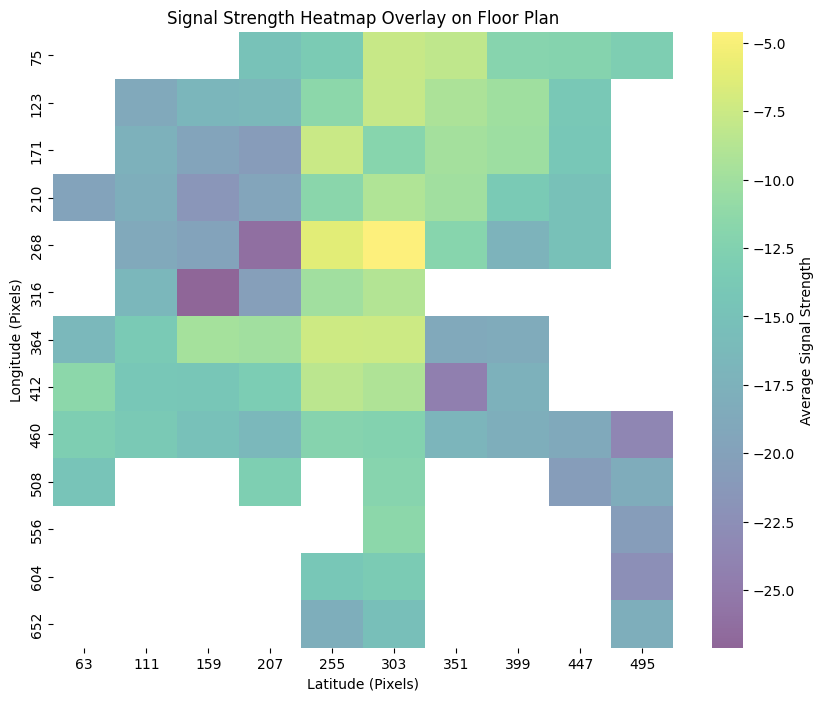

In [19]:
# Step 5: Plot the heatmap on the floor plan image
plt.figure(figsize=(10, 8))

# Define the boundaries of the room within the floor plan
# room_x_min, room_x_max = 220, img_width
# room_y_min, room_y_max = 435, img_height


# Display the floor plan image
# plt.imshow(floor_plan, extent=[0, img_width, img_height, 0])  # extent aligns the heatmap with the image

# Define an inset axes for the room's heatmap
# room_ax = plt.gca().inset_axes(
#     [room_x_min / floor_plan.shape[1],  # x-position of inset as fraction
#      1 - room_y_max / floor_plan.shape[0],  # y-position of inset as fraction (invert y-axis)
#      (room_x_max - room_x_min) / floor_plan.shape[1],  # width as fraction
#      (room_y_max - room_y_min) / floor_plan.shape[0]  # height as fraction
#     ]
# )

# Overlay the signal strength heatmap on the floor plan
sns.heatmap(signal_pivot, cmap='viridis', alpha=0.6, zorder=2, # ax=room_ax
            cbar_kws={'label': 'Average Signal Strength'},  # Color bar label
            xticklabels=True, yticklabels=True)  # Hides ticks for a cleaner overlay

# room_ax.set_xlim(room_x_min, room_x_max)
# room_ax.set_ylim(room_y_max, room_y_min)
# room_ax.axis('off')  # Hide axis for the inset


# Display the plot
plt.title('Signal Strength Heatmap Overlay on Floor Plan')
plt.ylabel('Longitude (Pixels)')
plt.xlabel('Latitude (Pixels)')
plt.show()

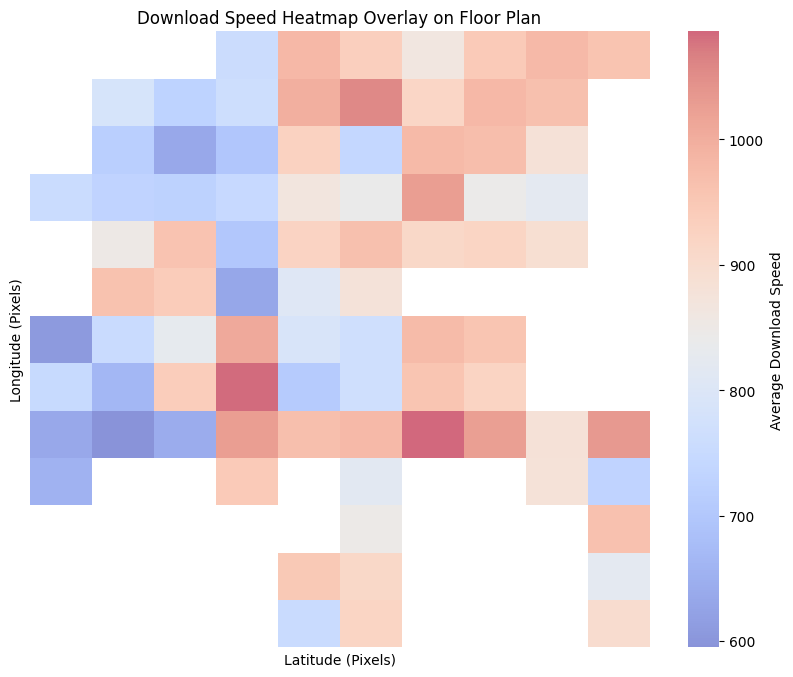

In [20]:
# Step 11: Plot the download speed heatmap for the room
plt.figure(figsize=(10, 8))
# plt.imshow(floor_plan, extent=[0, img_width, img_height, 0])

sns.heatmap(download_pivot, cmap='coolwarm', alpha=0.6, zorder=2,
            cbar_kws={'label': 'Average Download Speed'},
            xticklabels=False, yticklabels=False)  # Match extent to room boundaries

plt.title('Download Speed Heatmap Overlay on Floor Plan')
plt.ylabel('Longitude (Pixels)')
plt.xlabel('Latitude (Pixels)')
plt.show()

# **CNN Input Images Generation: LAMS Algorithm**
**TR Seperation Calculated as well...**

In [21]:
# Step 1: Import libraries and set up environment
import numpy as np
import pandas as pd
import cv2
import os
from math import sqrt

In [22]:
# Step 2: Set up folders for saving images
os.makedirs("CNN Input Images", exist_ok=True)
os.makedirs("Lams Scan Images", exist_ok=True)


In [23]:
# Step 3: Updated LAMS Algorithm function
def lams_algorithm(floor_plan, ap_coords, receiver_coords, w, n):
    # Initialize the LAMS image and a copy of the floor plan to draw Scan lines on
    lams_image = np.zeros((n, w), dtype=np.uint8)
    floor_plan_with_lines = floor_plan.copy()

    # Define coordinates for the transmitter (AP) and receiver
    x1, y1 = ap_coords
    x2, y2 = receiver_coords

    # Generate points along the line from AP to receiver
    line_points = np.linspace([x1, y1], [x2, y2], n)

    for i, (x_mid, y_mid) in enumerate(line_points):
        # Calculate perpendicular direction for the scan line
        dx, dy = x2 - x1, y2 - y1
        norm = sqrt(dx**2 + dy**2)
        dx_perp, dy_perp = -dy / norm, dx / norm

        # Calculate start and end points of the scan line
        x_start = int(x_mid - (w // 2) * dx_perp)
        y_start = int(y_mid - (w // 2) * dy_perp)
        x_end = int(x_mid + (w // 2) * dx_perp)
        y_end = int(y_mid + (w // 2) * dy_perp)

        # Sample the scan line and add values to the LAMS image
        scan_line = np.linspace([x_start, y_start], [x_end, y_end], w)
        scan_values = [
            floor_plan[int(y), int(x)] if 0 <= x < floor_plan.shape[1] and 0 <= y < floor_plan.shape[0] else 0
            for x, y in scan_line
        ]
        lams_image[i, :] = scan_values

        # Draw the scan line on the floor plan with lines
        cv2.line(floor_plan_with_lines, (x_start, y_start), (x_end, y_end), (20,0,0), 1)

    return lams_image, floor_plan_with_lines


In [24]:
# Step 4: Load processed_data.csv and extract receiver coordinates
data = pd.read_csv('processed_data.csv')
receiver_coords = list(zip(data['Pixel_Latitude_X'], data['Pixel_Longitude_Y']))
ap_coords = (312, 350)  # Fixed AP (Transmitter) coordinates
w, n = 100, 100  # Width and number of scan lines
floor_plan = cv2.imread('floor_plan.png', cv2.IMREAD_GRAYSCALE)
len(receiver_coords)

84

In [25]:
# Step 5: Generate and save images
tr_separation = []

for (lat, lon) in receiver_coords:
    receiver = (lat, lon)

    # Call the updated function to get both images
    lams_image, floor_plan_with_lines = lams_algorithm(floor_plan, ap_coords, receiver, w, n)

    # Save the LAMS image
    lams_filename = f"CNN Input Images/{lat}_{lon}.png"
    cv2.imwrite(lams_filename, lams_image)

    # Save the floor plan with scan lines
    scan_lines_filename = f"Lams Scan Images/{lat}_{lon}.png"
    cv2.imwrite(scan_lines_filename, floor_plan_with_lines)

    # Calculate and store TR separation
    tr_sep = sqrt((ap_coords[0] - lat) ** 2 + (ap_coords[1] - lon) ** 2)
    tr_separation.append(tr_sep)


In [26]:
# Step 6: Add TR Separation to CSV and Save
data['TR_separation'] = tr_separation
data.to_csv('processed_data_with_tr_separation.csv', index=False)

print("LAMS images and floor plans with scan lines have been saved.")
print("TR separation added to the CSV file successfully.")


LAMS images and floor plans with scan lines have been saved.
TR separation added to the CSV file successfully.


# Model Training

In [27]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt


In [28]:
# 1. Load CSV file
data = pd.read_csv("processed_data_with_tr_separation.csv")
data.head()

,Coordinate,Pixel_Latitude_X,Pixel_Longitude_Y,Network_Type,avg_signal_strength_dBm,avg_download_speed_Mbps,TR_separation
0,"111,123",111,123,Wi-Fi,-18.8,786.214288,303.199604
1,"111,171",111,171,Wi-Fi,-17.6,717.930458,269.150516
2,"111,210",111,210,Wi-Fi,-18.0,731.089554,244.951016
3,"111,268",111,268,Wi-Fi,-18.9,851.166909,217.082933
4,"111,316",111,316,Wi-Fi,-16.6,962.604422,203.855341


In [29]:
# 2. Load images and corresponding TR separation and RSS values
input_images = []
tr_separation = []
rss_labels = []

image_folder = "CNN Input Images"
for _, row in data.iterrows():
    lat, lon = row["Pixel_Latitude_X"], row["Pixel_Longitude_Y"]
    image_path = os.path.join(image_folder, f"{lat}_{lon}.png")

    # Read image and resize if needed
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        input_images.append(image)
        tr_separation.append(row["TR_separation"])
        rss_labels.append(row["avg_signal_strength_dBm"] + 100)  # Shift RSS by 100

# Convert to NumPy arrays
input_images = np.array(input_images) / 255.0  # Normalize images
input_images = np.expand_dims(input_images, axis=-1)  # Add channel dimension
tr_separation = np.array(tr_separation).reshape(-1, 1)  # Reshape as (N, 1)
rss_labels = np.array(rss_labels)

In [30]:
# 3. Train/Test Split
X_train, X_test, tr_train, tr_test, y_train, y_test = train_test_split(
    input_images, tr_separation, rss_labels, test_size=0.1, random_state=42
)

In [31]:
class DataGenerator(Sequence):
    def __init__(self, images, tr_sep, labels, batch_size):
        """
        Initialize the data generator.
        :param images: Input images (numpy array).
        :param tr_sep: TR separation values (numpy array).
        :param labels: Target labels (numpy array).
        :param batch_size: Number of samples per batch.
        """
        self.images = images
        self.tr_sep = tr_sep
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        """
        Number of batches per epoch.
        """
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        """
        Retrieve a batch of data.
        :param index: Index of the batch.
        :return: Tuple of inputs ([images, tr_sep]) and labels.
        """
        batch_images = self.images[index * self.batch_size:(index + 1) * self.batch_size]
        batch_tr_sep = self.tr_sep[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size:(index + 1) * self.batch_size]
        return [batch_images, batch_tr_sep], batch_labels

    def on_epoch_end(self):
        """
        Optional callback to shuffle data at the end of each epoch.
        """
        indices = np.arange(len(self.images))
        np.random.shuffle(indices)
        self.images = self.images[indices]
        self.tr_sep = self.tr_sep[indices]
        self.labels = self.labels[indices]

def data_generator(images, tr_sep, labels, batch_size):
    """
    A generator function that yields TensorFlow tensors with correct structure.
    """
    generator = DataGenerator(images, tr_sep, labels, batch_size)
    for i in range(len(generator)):
        batch_inputs, batch_labels = generator[i]
        yield ((tf.convert_to_tensor(batch_inputs[0], dtype=tf.float32),  # images
                tf.convert_to_tensor(batch_inputs[1], dtype=tf.float32)),  # tr_sep
               tf.convert_to_tensor(batch_labels, dtype=tf.float32))  # labels

In [32]:
# Define the output signature
output_signature = (
    (tf.TensorSpec(shape=(None,) + X_train.shape[1:], dtype=tf.float32),  # Image batch
     tf.TensorSpec(shape=(None,) + tr_train.shape[1:], dtype=tf.float32)),  # TR separation batch
    tf.TensorSpec(shape=(None,), dtype=tf.float32)  # Labels batch
)

# Create train and test datasets
batch_size = 5

train_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(X_train, tr_train, y_train, batch_size),
    output_signature=output_signature
).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(X_test, tr_test, y_test, batch_size),
    output_signature=output_signature
).prefetch(tf.data.AUTOTUNE)


In [33]:
# # 5. Define the CNN Model with Distance Neuron
# def create_cnn_with_distance(input_shape=(100, 100, 1)):
#     # Image branch
#     image_input = tf.keras.Input(shape=input_shape, name="image_input")
#     x = layers.Conv2D(3, (6, 6), strides=1, padding="VALID", activation="relu")(image_input)
#     x = layers.Conv2D(6, (3, 3), strides=1, padding="VALID", activation="relu")(x)
#     x = layers.Conv2D(3, (3, 3), strides=1, padding="SAME", activation="relu")(x)
#     x = layers.Conv2D(3, (3, 3), strides=1, padding="SAME", activation="relu")(x)
#     x = layers.Conv2D(2, (3, 3), strides=1, padding="VALID", activation="relu")(x)
#     x = layers.Flatten()(x)

#     # Distance neuron input
#     distance_input = tf.keras.Input(shape=(1,), name="distance_input")

#     # Concatenate image features and distance neuron
#     combined = tf.keras.layers.Concatenate()([x, distance_input])

#     # Fully connected layers
#     fc = layers.Dense(7, activation="relu")(combined)
#     fc = layers.Dense(3, activation="relu")(fc)

#     # Output layer
#     output = layers.Dense(1, activation="linear", name="rss_output")(fc)

#     # Create model
#     model = tf.keras.Model(inputs=[image_input, distance_input], outputs=output)

#     # Compile model
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-6),
#         loss="mean_squared_error",
#         metrics=[tf.keras.metrics.RootMeanSquaredError()]
#     )

#     return model

# model = create_cnn_with_distance(input_shape=(100, 100, 1))  # Assuming your input image shape


In [34]:
def create_cnn_with_distance(input_shape=(100, 100, 1)):  # Adjusting to 3 input channels
    # Image branch
    image_input = tf.keras.Input(shape=input_shape, name="image_input")

    # Convolutional layer C1: Input channels = 3, Output channels = 6, Kernel size = 4x4, Stride = 3
    x = layers.Conv2D(3, (6, 6), strides=1, padding="VALID", activation="relu")(image_input)

    x = layers.Conv2D(6, (4, 4), strides=3, padding="VALID", activation="relu")(x)
    # Convolutional layer C2: Input channels = 6, Output channels = 3, Kernel size = 3x3, Stride = 2
    x = layers.Conv2D(3, (3, 3), strides=2, padding="VALID", activation="relu")(x)

    # Convolutional layer Cmj: Input channels = 3, Output channels = 3, Kernel size = 2x2, Stride = 1
    x = layers.Conv2D(3, (2, 2), strides=1, padding="SAME", activation="relu")(x)
    x = layers.Conv2D(3, (2, 2), strides=1, padding="SAME", activation="relu")(x)

    # Convolutional layer Cf: Input channels = 3, Output channels = 2, Kernel size = 2x2, Stride = 2
    x = layers.Conv2D(2, (2, 2), strides=2, padding="VALID", activation="relu")(x)

    # Flatten the output
    x = layers.Flatten()(x)

    # Distance neuron input
    distance_input = tf.keras.Input(shape=(1,), name="distance_input")

    # Concatenate image features and distance neuron
    combined = tf.keras.layers.Concatenate()([x, distance_input])

    # Fully connected layers
    fc = layers.Dense(7, activation="relu")(combined)
    fc = layers.Dense(3, activation="relu")(fc)

    # Output layer
    output = layers.Dense(1, activation="linear", name="rss_output")(fc)

    # Create model
    model = tf.keras.Model(inputs=[image_input, distance_input], outputs=output)

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99, epsilon=1e-6),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    return model

# Instantiate the model
model = create_cnn_with_distance(input_shape=(100, 100, 1))  # Adjusting input shape for 3 channels


In [35]:
# 6. Train the Model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=50,  # Adjust epochs based on performance
    verbose=1
)

Epoch 1/50
     15/Unknown 6s 4ms/step - loss: 7419.5039 - root_mean_squared_error: 86.1341

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 7418.2627 - root_mean_squared_error: 86.1271 - val_loss: 6612.6519 - val_root_mean_squared_error: 81.3182
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7415.6836 - root_mean_squared_error: 86.1121 - val_loss: 6610.2163 - val_root_mean_squared_error: 81.3032
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7413.1045 - root_mean_squared_error: 86.0971 - val_loss: 6607.7832 - val_root_mean_squared_error: 81.2883
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7410.5269 - root_mean_squared_error: 86.0822 - val_loss: 6605.3496 - val_root_mean_squared_error: 81.2733
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7407.9497 - root_mean_squared_error: 86.0672 - val_loss: 6602.9170 - val_root_mean_squared_error: 81.2583
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7405.3730 - root_mean_squared_error: 86.0522 - val_loss: 6600.4854 - val_root_mean_squared_error: 81.2434
Epoch 7/50
15/15 ━━━━━━━━━

In [36]:
# 7. Evaluate the Model
loss, rmse = model.evaluate(test_dataset)
print(f"Test Loss: {loss}, Test RMSE: {rmse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6511.7627 - root_mean_squared_error: 80.6953
Test Loss: 6493.99267578125, Test RMSE: 80.58531188964844


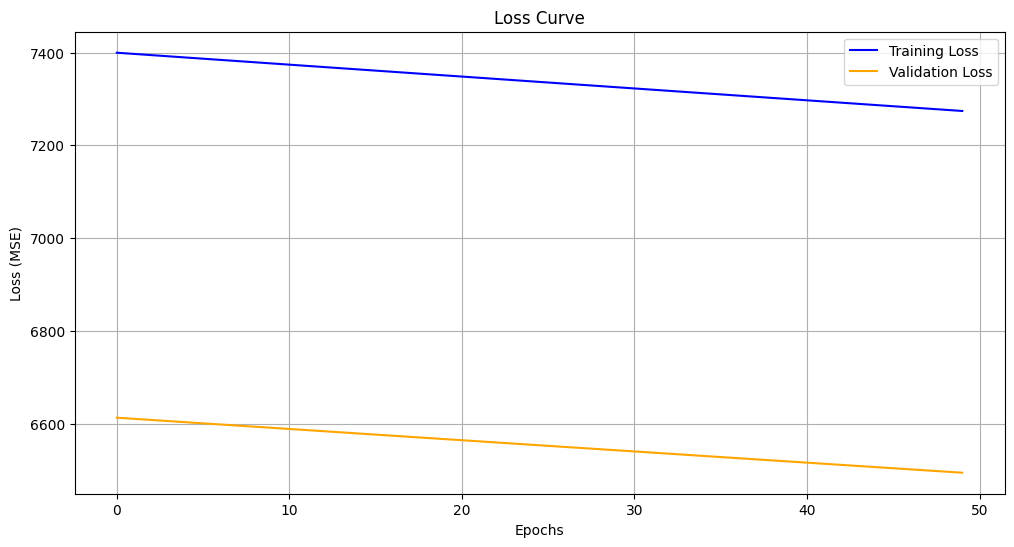

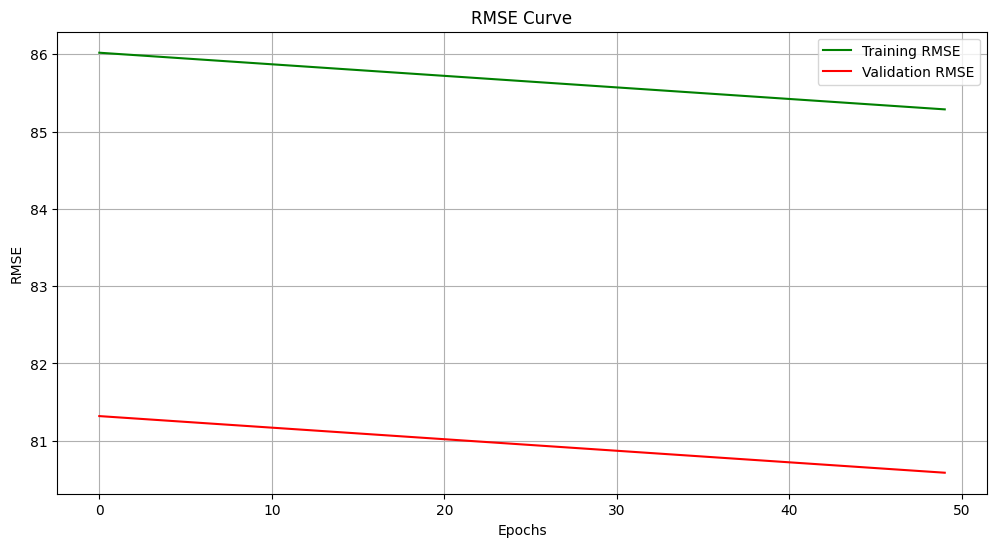

In [37]:
# Plot Loss Curve
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE Curve
plt.figure(figsize=(12, 6))
plt.plot(history.history["root_mean_squared_error"], label="Training RMSE", color="green")
plt.plot(history.history["val_root_mean_squared_error"], label="Validation RMSE", color="red")
plt.title("RMSE Curve")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Step 1: Load test data (coordinates, TR separation, and image paths)
test_data = pd.read_csv('processed_data_with_tr_separation.csv')
image_folder = "CNN Input Images"  # Folder where CNN input images are saved

# Prepare empty lists for predictions, coordinates, and TR separation
predicted_rss = []
coordinates = []
tr_separation_list = []

# Step 2: Loop through each coordinate and make predictions
for idx, row in test_data.iterrows():
    # Get coordinates and TR separation
    lat, lon = row['Pixel_Latitude_X'], row['Pixel_Longitude_Y']
    tr_separation = row['TR_separation']  # Ensure this column exists in your CSV
    coordinates.append((lat, lon))
    tr_separation_list.append(tr_separation)  # Save TR separation for later use

    # Load the corresponding image
    image_path = os.path.join(image_folder, f"{lat}_{lon}.png")
    if not os.path.exists(image_path):
        print(f"Image not found for coordinates: ({lat}, {lon})")
        continue

    # Preprocess the image for the CNN model
    img = load_img(image_path, target_size=(100, 100), color_mode='grayscale')  # Ensure correct dimensions
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Prepare TR separation input for the model
    tr_separation_array = np.array([[tr_separation]], dtype=np.float32)  # Reshape as (batch_size, 1)

    # Step 3: Make predictions using the trained model
    rss_pred = model.predict([img_array, tr_separation_array], verbose=0)  # Pass both inputs
    predicted_rss.append(rss_pred[0][0] - 100)  # Extract the single predicted value (RSS)

# Step 4: Create a DataFrame with coordinates, predictions, and TR separation
results_df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])
results_df['TR_separation'] = tr_separation_list
results_df['Predicted_RSS'] = predicted_rss

# Save the results to a CSV file
results_df.to_csv('predicted_rss_with_tr_separation.csv', index=False)
print("Predicted RSS values saved to 'predicted_rss_with_tr_separation.csv'.")

# Optional: Display a preview of the results
print(results_df.head())



Predicted RSS values saved to 'predicted_rss_with_tr_separation.csv'.
   Latitude  Longitude  TR_separation  Predicted_RSS
0       111        123     303.199604     -99.250794
1       111        171     269.150516     -99.250794
2       111        210     244.951016     -99.250794
3       111        268     217.082933     -99.250794
4       111        316     203.855341     -99.250794


In [39]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the floor plan
floor_plan = cv2.imread('floor_plan.png', cv2.IMREAD_GRAYSCALE)
floor_plan_rgb = cv2.cvtColor(floor_plan, cv2.COLOR_GRAY2RGB)  # Convert to RGB for better visualization

# Step 2: Load the predicted values
# Ensure your DataFrame has 'x', 'y', and 'predicted_rss' columns
predicted_data = pd.read_csv('predicted_rss_with_tr_separation.csv')  # Replace with your file

# Step 3: Create a blank heatmap matrix matching the floor plan size
heatmap_matrix = np.zeros_like(floor_plan, dtype=float)

# Step 4: Populate the matrix with predicted values
for _, row in predicted_data.iterrows():
    x, y, predicted_rss = int(row['Latitude']), int(row['Longitude']), row['Predicted_RSS']
    if 0 <= x < heatmap_matrix.shape[1] and 0 <= y < heatmap_matrix.shape[0]:
        heatmap_matrix[y, x] = predicted_rss  # Note: (y, x) for image coordinates

# Step 5: Smooth the heatmap matrix (optional for better visualization)
# smoothed_heatmap = cv2.GaussianBlur(heatmap_matrix, (5, 5), 0)

# # Step 6: Plot the heatmap overlaid on the floor plan
# plt.figure(figsize=(10, 8))
# sns.heatmap(heatmap_matrix,
#             cmap='coolwarm',
#             alpha=0.5,  # Transparency for overlay
#             cbar=True,
#             zorder=2)  # Overlay heatmap
# plt.imshow(floor_plan, cmap='gray', zorder=1)  # Background floor plan
# plt.axis('off')
# plt.title('Predicted RSS Heatmap Overlaid on Floor Plan', fontsize=16)
# plt.show()


In [40]:
# Get the dimensions of the image
img_height, img_width = floor_plan.shape
# Step 4: Create pivot tables for signal strength and download speed based on coordinates
# Note: Ensure latitude and longitude correspond to image coordinates (pixels)
signal_pivot = np.random.rand(img_width, img_height)
signal_pivot = predicted_data.pivot_table(index='Longitude', columns='Latitude', values='Predicted_RSS')
# download_pivot = predicted_datadata.pivot_table(index='Pixel_Longitude_Y', columns='Pixel_Latitude_X', values='avg_download_speed_Mbps')
signal_pivot.shape


(13, 10)

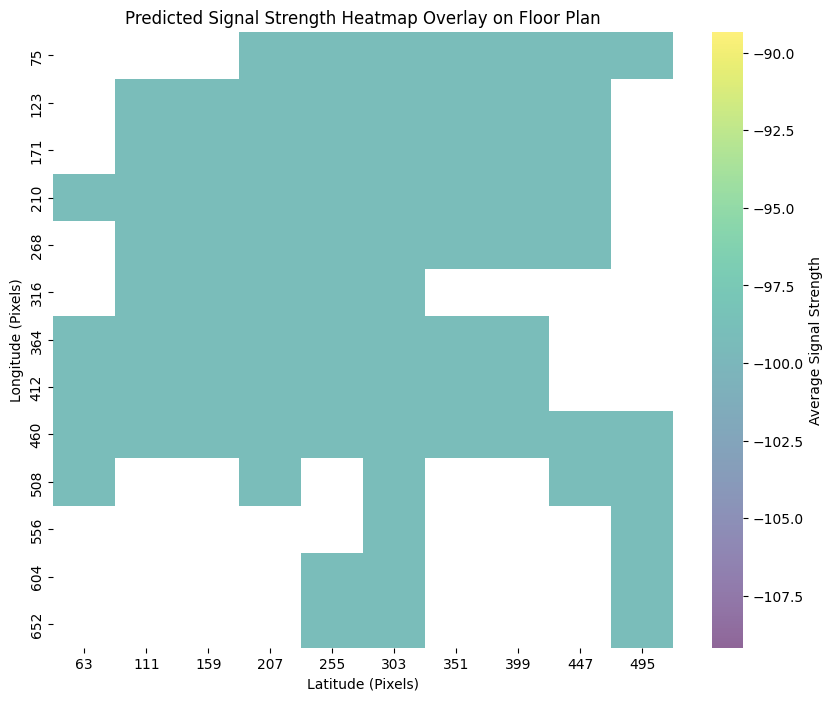

In [41]:
# Step 5: Plot the heatmap on the floor plan image
plt.figure(figsize=(10, 8))

# Define the boundaries of the room within the floor plan
# room_x_min, room_x_max = 220, img_width
# room_y_min, room_y_max = 435, img_height


# Display the floor plan image
# plt.imshow(floor_plan, extent=[0, img_width, img_height, 0])  # extent aligns the heatmap with the image

# Define an inset axes for the room's heatmap
# room_ax = plt.gca().inset_axes(
#     [room_x_min / floor_plan.shape[1],  # x-position of inset as fraction
#      1 - room_y_max / floor_plan.shape[0],  # y-position of inset as fraction (invert y-axis)
#      (room_x_max - room_x_min) / floor_plan.shape[1],  # width as fraction
#      (room_y_max - room_y_min) / floor_plan.shape[0]  # height as fraction
#     ]
# )

# Overlay the signal strength heatmap on the floor plan
sns.heatmap(signal_pivot, cmap='viridis', alpha=0.6, zorder=2, # ax=room_ax
            cbar_kws={'label': 'Average Signal Strength'},  # Color bar label
            xticklabels=True, yticklabels=True)  # Hides ticks for a cleaner overlay

# room_ax.set_xlim(room_x_min, room_x_max)
# room_ax.set_ylim(room_y_max, room_y_min)
# room_ax.axis('off')  # Hide axis for the inset


# Display the plot
plt.title('Predicted Signal Strength Heatmap Overlay on Floor Plan')
plt.ylabel('Longitude (Pixels)')
plt.xlabel('Latitude (Pixels)')
plt.show()

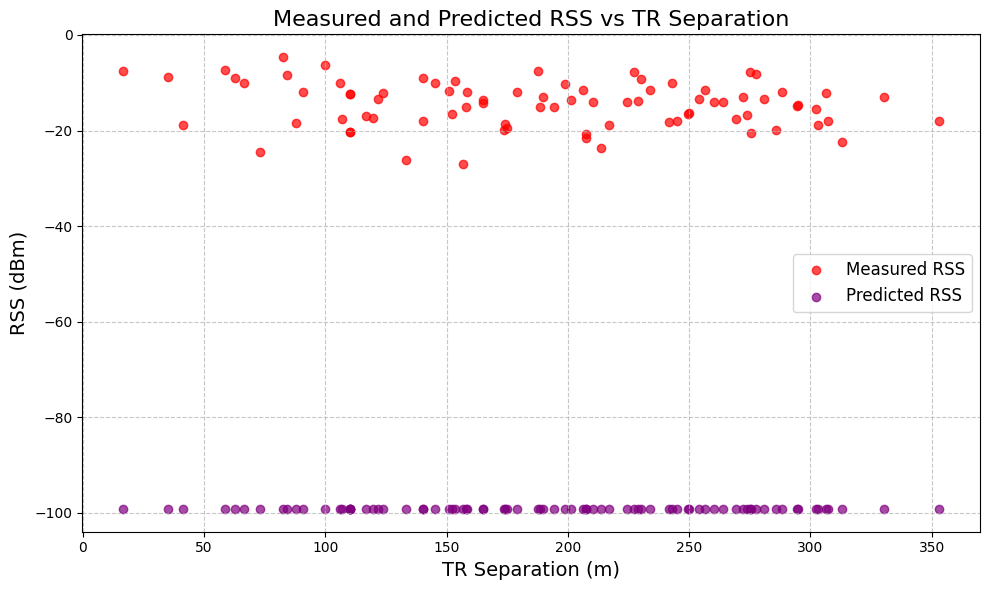

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the measured and predicted data
measured_data = pd.read_csv('processed_data_with_tr_separation.csv')  # Replace with your file
predicted_data = pd.read_csv('predicted_rss_with_tr_separation.csv')  # Replace with your file

# Merge the data on TR_separation and Type
data = pd.merge(measured_data, predicted_data, on=['TR_separation'])
data.head()

# Separate LoS and NLoS data
# los_data = data[data['Type'] == 'LoS']
# nlos_data = data[data['Type'] == 'NLoS']

# Define a curve fitting function (exponential decay as an example)
def rss_curve(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit curves for LoS and NLoS
# params_measured, _ = curve_fit(rss_curve, data['TR_separation'], data['avg_signal_strength_dBm'])
# params_predicted, _ = curve_fit(rss_curve, data['TR_separation'], data['Predicted_RSS'])
# nlos_params_measured, _ = curve_fit(rss_curve, nlos_data['TR_separation'], nlos_data['Measured_RSS'])
# nlos_params_predicted, _ = curve_fit(rss_curve, nlos_data['TR_separation'], nlos_data['Predicted_RSS'])

# Generate x values for smooth curves
x_vals = np.linspace(0, max(data['TR_separation']), 500)

# Generate curve fits
# curve_measured = rss_curve(x_vals, *params_measured)
# curve_predicted = rss_curve(x_vals, *params_predicted)
# nlos_curve_measured = rss_curve(x_vals, *nlos_params_measured)
# nlos_curve_predicted = rss_curve(x_vals, *nlos_params_predicted)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(data['TR_separation'], data['avg_signal_strength_dBm'], color='red', label='Measured RSS', alpha=0.7)
plt.scatter(data['TR_separation'], data['Predicted_RSS'], color='purple', label='Predicted RSS', alpha=0.7)
# plt.scatter(nlos_data['TR_separation'], nlos_data['Measured_RSS'], color='blue', label='NLoS: Measured RSS', alpha=0.7)
# plt.scatter(nlos_data['TR_separation'], nlos_data['Predicted_RSS'], color='cyan', label='NLoS: Predicted RSS', alpha=0.7)

# Curve fits
# plt.plot(x_vals, curve_measured, color='red', linestyle='-', linewidth=2, label='Curve Fit of Measured RSS')
# plt.plot(x_vals, curve_predicted, color='purple', linestyle='--', linewidth=2, label='Curve Fit of Predicted RSS')
# plt.plot(x_vals, nlos_curve_measured, color='blue', linestyle='-', linewidth=2, label='NLoS: Curve Fit of Measured RSS')
# plt.plot(x_vals, nlos_curve_predicted, color='cyan', linestyle='--', linewidth=2, label='NLoS: Curve Fit of Predicted RSS')

# Customize plot
plt.title('Measured and Predicted RSS vs TR Separation', fontsize=16)
plt.xlabel('TR Separation (m)', fontsize=14)
plt.ylabel('RSS (dBm)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


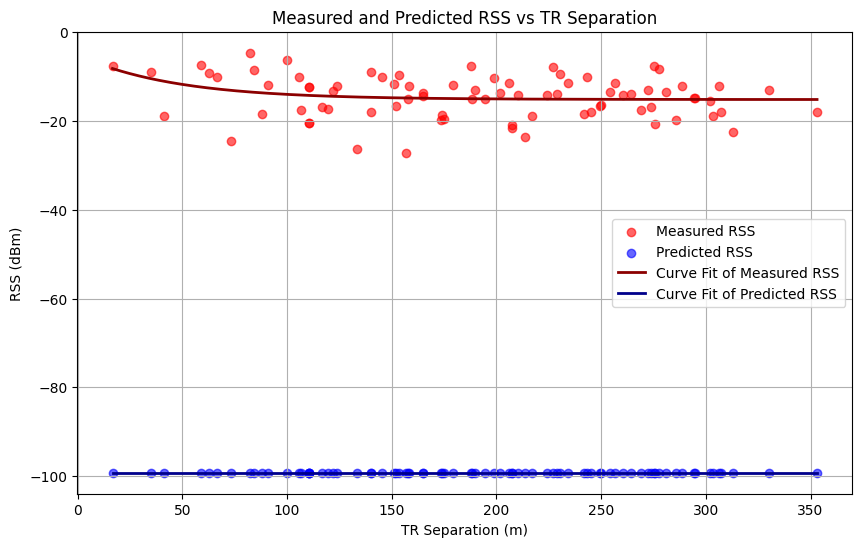

In [43]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a robust RSS curve function
def rss_curve(x, a, b, c):
    return c + a * np.exp(-b * np.clip(x, 0, np.inf))  # Clamping x to avoid extreme values

# Clamp data to avoid infinite or NaN values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Add reasonable initial guesses and parameter bounds
initial_guess = [1, 1, -50]
bounds = ([0, 0, -200], [10, 10, 0])

# Fit measured data
params_measured, _ = curve_fit(
    rss_curve,
    data['TR_separation'],
    data['avg_signal_strength_dBm'],
    p0=initial_guess,
    bounds=bounds
)

# Fit predicted data
params_predicted, _ = curve_fit(
    rss_curve,
    data['TR_separation'],
    data['Predicted_RSS'],
    p0=initial_guess,
    bounds=bounds
)

# Generate predictions for plotting
x_vals = np.linspace(data['TR_separation'].min(), data['TR_separation'].max(), 500)
y_measured = rss_curve(x_vals, *params_measured)
y_predicted = rss_curve(x_vals, *params_predicted)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(data['TR_separation'], data['avg_signal_strength_dBm'], color='red', label='Measured RSS', alpha=0.6)
plt.scatter(data['TR_separation'], data['Predicted_RSS'], color='blue', label='Predicted RSS', alpha=0.6)
plt.plot(x_vals, y_measured, color='darkred', label='Curve Fit of Measured RSS', linewidth=2)
plt.plot(x_vals, y_predicted, color='darkblue', label='Curve Fit of Predicted RSS', linewidth=2)
plt.xlabel('TR Separation (m)')
plt.ylabel('RSS (dBm)')
plt.title('Measured and Predicted RSS vs TR Separation')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
model.save("/content/signal_strength_prediction_model.h5")

Data Preview:
             Timestamp           Download Speed  Download Speed (Additional)  \
0   2024-11-27 19:9:21   533.5240930944057 Mbps                          NaN   
1  2024-11-27 19:11:21  1030.9992609797298 Mbps                          NaN   
2  2024-11-27 19:13:21   965.7461431962025 Mbps                          NaN   
3  2024-11-27 19:15:21   876.9419001436783 Mbps                          NaN   
4  2024-11-27 19:17:21    820.365003360215 Mbps                          NaN   

  Signal Strength  Signal Strength (Additional) Network Type Device Status  \
0       -14.0 dBm                           NaN        Wi-Fi       Unknown   
1       -16.0 dBm                           NaN        Wi-Fi       Unknown   
2       -15.0 dBm                           NaN        Wi-Fi       Unknown   
3       -15.0 dBm                           NaN        Wi-Fi       Unknown   
4       -15.0 dBm                           NaN        Wi-Fi       Unknown   

   Latitude  Longitude  Predicted_Si

<ipython-input-46-8b052da69962>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("Unknown", np.nan, inplace=True)


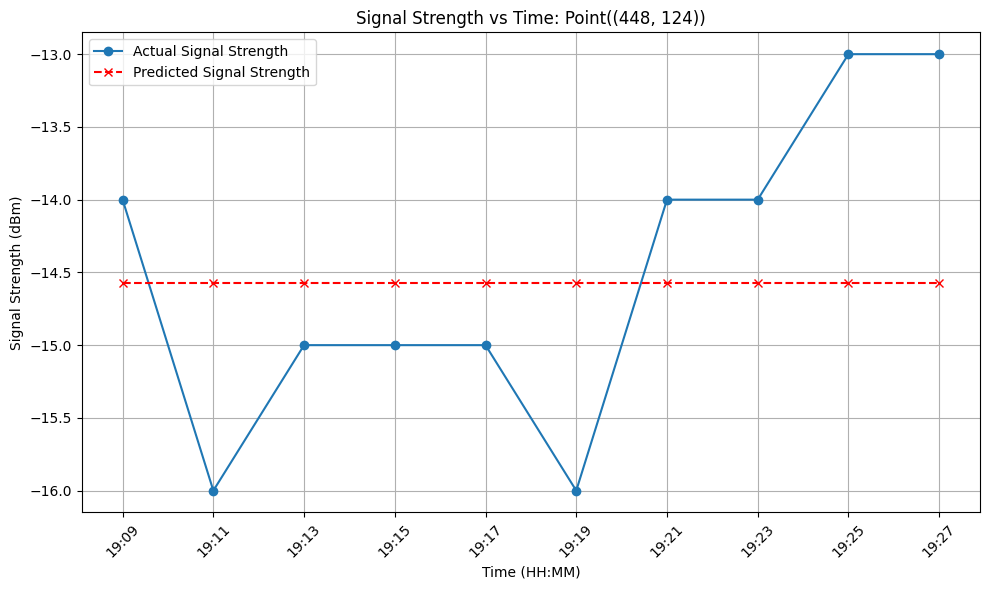

Data Preview:
             Timestamp           Download Speed  Download Speed (Additional)  \
0  2024-11-27 20:17:32  1045.1225385273974 Mbps                          NaN   
1  2024-11-27 20:19:32   1121.969784007353 Mbps                          NaN   
2  2024-11-27 20:21:32   978.1275040064103 Mbps                          NaN   
3  2024-11-27 20:22:32  1089.9135044642856 Mbps                          NaN   
4  2024-11-27 20:23:32   811.6377160904256 Mbps                          NaN   

  Signal Strength  Signal Strength (Additional) Network Type Device Status  \
0       -10.0 dBm                           NaN        Wi-Fi       Unknown   
1       -15.0 dBm                           NaN        Wi-Fi       Unknown   
2       -10.0 dBm                           NaN        Wi-Fi       Unknown   
3       -15.0 dBm                           NaN        Wi-Fi       Unknown   
4       -10.0 dBm                           NaN        Wi-Fi       Unknown   

   Latitude  Longitude  Predicted_Si

<ipython-input-46-8b052da69962>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("Unknown", np.nan, inplace=True)


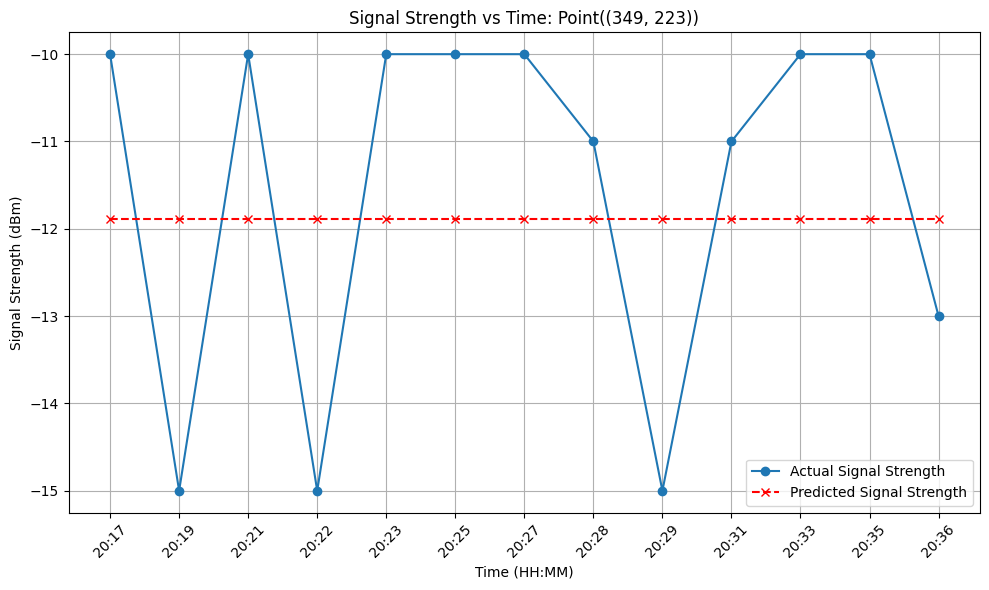

In [46]:
excel_files = glob.glob("Time_Data/*.xlsx")

for file in excel_files:
# Step 3: Inspect the data to understand its structure
  data = pd.read_excel(file)
  print("Data Preview:")
  print(data.head())
  data.replace("Unknown", np.nan, inplace=True)
  data.dropna(axis=1, how='all', inplace=True)
  data = data.drop(columns=['Download Speed (Additional)', 'Signal Strength (Additional)', 'Unnamed: 9', 'Unnamed: 10'], errors='ignore')

  print("Data Shape:")
  print(data.shape)
  print("Cleaned Data:")
  print(data.head())

  # Step 5: Clean 'Download Speed' and 'Signal Strength' columns by removing any non-numeric characters
  # Remove any non-numeric characters like "dBm" from 'signal_strength'
  # Use regex to capture only the numeric part of the string
  data['Download Speed'] = data['Download Speed'].astype(str).str.extract(r'([-]?\d+\.?\d*)')[0]
  data['Signal Strength'] = data['Signal Strength'].astype(str).str.extract(r'([-]?\d+\.?\d*)')[0]

  # Step 5: Convert cleaned columns to numeric, handling any errors by setting invalid entries to NaN
  data['Download Speed'] = pd.to_numeric(data['Download Speed'], errors='coerce')
  data['Signal Strength'] = pd.to_numeric(data['Signal Strength'], errors='coerce')

  # Convert 'Timestamp' column to datetime format
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])

  # Extract only the hours and minutes in 'HH:MM' format
  data['Timestamp'] = data['Timestamp'].dt.strftime('%H:%M')

  # Display the cleaned data
  print("Cleaned Timestamp Data Preview:")
  print(data[['Timestamp', 'Signal Strength']].head())

   # Plot actual and predicted data
  plt.figure(figsize=(10, 6))
  plt.plot(data['Timestamp'], data['Signal Strength'], marker='o', label='Actual Signal Strength')
  plt.plot(data['Timestamp'], data['Predicted_Signal_Strength'], marker='x', linestyle='--', color='red', label='Predicted Signal Strength')
  plt.xlabel('Time (HH:MM)')
  plt.ylabel('Signal Strength (dBm)')
  plt.title(f"Signal Strength vs Time: Point({data['Latitude'][0], data['Longitude'][0]})")
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()